In [4]:
import os 
fname = os.path.join(os.getcwd(), "Downloads", "128_128_128_0000.shard")

In [5]:
with open(fname, mode='rb') as f:
    data = f.read()

In [6]:
minishard_bits = 6
entries = 2**minishard_bits
shard_index_end = entries * 16
entry = 0
start_offset, end_offset = 0, 0
for i in range(entries):
    start_offset, end_offset = int.from_bytes(data[i*8:i*8+8], byteorder='little',signed=False), int.from_bytes(data[i*8+8:i*8+16], byteorder='little', signed=False)
    if start_offset != end_offset:
        entry = i
        break
entry, start_offset, end_offset, len(data)

(0, 3819105, 3819568, 3820592)

In [7]:
import gzip
minishard_index_gzipped = data[shard_index_end+start_offset:shard_index_end+end_offset]
len(minishard_index_gzipped)
minishard_data = gzip.decompress(minishard_index_gzipped)
n = len(minishard_data)//24
n

116

In [8]:
d = data[shard_index_end:]
chunk = {}
for i in range(n):
    chunk[i] = {
        'id': int.from_bytes(minishard_data[i*8:i*8+8], byteorder='little', signed=False),
        'offset': int.from_bytes(minishard_data[n*8+i*8:n*8+i*8+8], byteorder='little', signed=False),
        'size': int.from_bytes(minishard_data[n*16+i*8:n*16+i*8+8], byteorder='little', signed=False)
    }
chunk

{0: {'id': 0, 'offset': 0, 'size': 8291},
 1: {'id': 1, 'offset': 0, 'size': 11355},
 2: {'id': 1, 'offset': 0, 'size': 31858},
 3: {'id': 1, 'offset': 0, 'size': 43187},
 4: {'id': 1, 'offset': 0, 'size': 29534},
 5: {'id': 1, 'offset': 0, 'size': 28669},
 6: {'id': 1, 'offset': 0, 'size': 53355},
 7: {'id': 1, 'offset': 0, 'size': 44598},
 8: {'id': 1, 'offset': 0, 'size': 12004},
 9: {'id': 1, 'offset': 0, 'size': 11852},
 10: {'id': 1, 'offset': 0, 'size': 41493},
 11: {'id': 1, 'offset': 0, 'size': 47688},
 12: {'id': 1, 'offset': 0, 'size': 29743},
 13: {'id': 1, 'offset': 0, 'size': 29863},
 14: {'id': 1, 'offset': 0, 'size': 44818},
 15: {'id': 1, 'offset': 0, 'size': 51235},
 16: {'id': 1, 'offset': 0, 'size': 32308},
 17: {'id': 1, 'offset': 0, 'size': 40195},
 18: {'id': 1, 'offset': 0, 'size': 28596},
 19: {'id': 1, 'offset': 0, 'size': 32772},
 20: {'id': 1, 'offset': 0, 'size': 50930},
 21: {'id': 1, 'offset': 0, 'size': 42101},
 22: {'id': 1, 'offset': 0, 'size': 44652},

In [9]:
def get_jpeg(index: int) -> bytes:
    offset = 0
    for i in range(index):
        offset += chunk[i]['offset'] + chunk[i]['size']
    offset += chunk[index]['offset']
    return d[offset:offset+chunk[index]['size']]

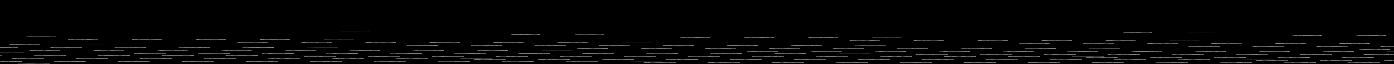

In [16]:
jpeg = get_jpeg(112)
import IPython
IPython.display.Image(jpeg)

In [17]:
import simplejpeg
img = simplejpeg.decode_jpeg(jpeg, colorspace='GRAY')
img.shape

(64, 1394, 1)